# Lesson 2: NumPy and Pandas for 1D Data

## Load Data from CSV

In [1]:
import numpy as np
import pandas as pd

employment = pd.read_csv('../resources/lesson2/employment_above_15.csv')
employment[0:2]

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,56.700001,56.500000,56.599998,56.200001,56.200001,56.099998,56.200001,56.200001,56.099998,56.099998,56.500000,56.400002,54.400002,56.000000,54.0,56.000000,55.700001
1,Albania,52.700001,52.299999,52.400002,52.700001,52.799999,52.599998,52.400002,52.099998,52.099998,51.900002,51.799999,51.799999,51.799999,51.700001,51.5,51.400002,51.400002


## Find maximum element in pandas array.

Find maximum employment value and corresponding year for a given country.

In [2]:
def filter_by_country(values, country: str):
    return values[values['Country'] == country]

def print_max_employment(country: str):
    employment_years = employment.keys()[1:]
    employment_values = filter_by_country(employment, country).values[0][1:]

    employment_max = employment_values.max()
    employment_max_year = employment_years[employment_values.argmax()]

    print("Maximum employment in {} was {} in the year {}.".format(country, employment_max, employment_max_year))

Find maximum employment for some countries.

In [3]:
filter_by_country(employment, 'Australia')

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
6,Australia,57.200001,56.200001,55.900002,56.900002,58.400002,58.200001,57.900002,58.299999,58.700001,59.400002,59.200001,59.5,59.900002,60.099998,61.200001,61.599998,61.5


In [4]:
print_max_employment('Australia')

Maximum employment in Australia was 61.5999984741 in the year 2006.


In [5]:
filter_by_country(employment, 'Germany')

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
60,Germany,56.200001,55.0,54.0,53.400002,53.400002,53.099998,52.700001,53.400002,53.599998,53.700001,53.599998,52.900002,52.0,51.900002,51.900002,52.799999,53.5


In [6]:
print_max_employment('Germany')

Maximum employment in Germany was 56.2000007629 in the year 1991.


In [7]:
filter_by_country(employment, 'United States')

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
169,United States,61.299999,61.099998,61.400002,62.200001,62.599998,62.900002,63.400002,63.799999,64.0,64.199997,63.299999,62.299999,61.799999,61.799999,62.200001,62.599998,62.299999


In [8]:
print_max_employment('United States')

Maximum employment in United States was 64.1999969482 in the year 2000.


## Calculate overall completion rate

In [9]:
completion_rate_female = pd.read_csv('../resources/lesson2/female_completion_rate.csv')
completion_rate_male = pd.read_csv('../resources/lesson2/male_completion_rate.csv')

completion_rate_female.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,4.19285,NaN,NaN,5.14529,5.91965,...,NaN,NaN,NaN,18.74188,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.27718,97.70814,NaN,NaN,NaN,90.41091,89.76010,86.01452,89.53901
4,Algeria,NaN,NaN,30.90031,33.02938,34.32702,39.7942,45.24156,48.22515,50.49138,...,90.09179,91.27633,93.30839,94.21432,NaN,97.35583,109.72854,95.13346,95.87439,94.20928


Extract the countries (column headings) and separately calculate the overall completion rates (values)
as the average of the male and female completion rates.

In [10]:
completion_rate_countries = completion_rate_female.values[:, 0]
completion_rate_sum_values = (completion_rate_male.values[:, 1:] + completion_rate_female.values[:, 1:]) / 2.0

Combine the column headings and overall completion rates to a new data frame.

In [11]:
completion_rate_keys = completion_rate_female.keys()
completion_rate_overall = pd.DataFrame(data=completion_rate_sum_values, columns=completion_rate_keys[1:])
completion_rate_overall.insert(0, value=completion_rate_countries, column=completion_rate_keys[0])
completion_rate_overall

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,15.2123,NaN,NaN,15.9419,17.4965,...,NaN,NaN,NaN,33.5513,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,101.093,98.4074,NaN,NaN,NaN,89.9299,89.2982,86.2525,88.8601
4,Algeria,NaN,NaN,43.146,45.2209,47.5222,53.0432,58.9112,61.6345,63.9421,...,90.2181,91.6582,92.9948,94.44,NaN,96.416,115.532,94.1489,95.9826,94.3627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Bonaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Sark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,Chinese Taipei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Saint Eustatius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
completion_rate_overall[completion_rate_overall['Country'] == 'United States']

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
240,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.163,101.541,100.373,99.1939,98.207,100.221,100.59,102.428,103.651,NaN


## Standardizing data

Select employment data for all countries for the year 2007.

In [13]:
employment_countries = employment['Country']
employment_2007 = employment['2007']

pd.DataFrame([employment_countries, employment_2007])

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
Country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
2007,55.7,51.4,50.5,75.7,58.4,40.1,61.5,57.1,60.9,66.6,...,59.3,62.3,57.5,57.5,59.9,71,32,39,61,66.8


Calculate the employment rates in standard deviations from the mean value.

In [14]:
employment_2007_sd = (employment_2007 - employment_2007.mean()) / employment_2007.std()
pd.DataFrame([employment_countries, employment_2007_sd])

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
Country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
2007,-0.279098,-0.687864,-0.77342,1.62214,-0.0224302,-1.76206,0.272262,-0.146011,0.215225,0.757078,...,0.0631253,0.348311,-0.107986,-0.107986,0.120163,1.17535,-2.53207,-1.86663,0.224731,0.77609


## NumPy index arrays

Find out how much time the students who joined for at least 7 days have spent in the classroom.

In [15]:
days_to_cancel = np.array([
    4, 5, 37, 3, 12,
    4, 35, 38, 5, 37,
    3, 3, 68, 38, 98,
    2, 249, 2, 127, 35])
time_spent = np.array([
    12.89697233, 0., 64.55043217, 0., 24.2315615,
    39.991625, 0., 0., 147.20683783, 0.,
    0., 0., 45.18261617, 157.60454283, 133.2434615,
    52.85000767, 0., 54.9204785, 26.78142417, 0.])

time_spent_if_gte_7_days = time_spent[days_to_cancel >= 7]
print(len(time_spent_if_gte_7_days), 'students joined for at least 7 days. ')

11 students joined for at least 7 days. 


Calculate the mean of time spent by these students.

In [16]:
time_spent_if_gte_7_days.mean()

41.05400348545454

## In-place operators on NumPy arrays

The `+=` vector operator works _in-place_: the original array will be modified.

In [17]:
a = np.array([0, 1, 2, 3])
b = a
a += np.array([1, 1, 1, 1])

print("Resulting array:", a)
print("Original array: ", b)

Resulting array: [1 2 3 4]
Original array:  [1 2 3 4]


The `+` vector operator works _not in-place_: the original array will not be modified.

In [18]:
a = np.array([0, 1, 2, 3])
b = a
a = a + np.array([1, 1, 1, 1])

print("Resulting array:", a)
print("Original array: ", b)

Resulting array: [1 2 3 4]
Original array:  [0 1 2 3]


The slice operator for arrays works _in-place_, other than the one for lists.

In [19]:
list_int = [0, 1, 2, 3]
array_int = np.array(list_int)

list_slice = list_int[:2]
array_slice = array_int[:2]

list_slice[1] = 100
array_slice[1] = 100

print("List after modifying the slice: ", list_int)
print("Array after modifying the slice:", array_int)

List after modifying the slice:  [0, 1, 2, 3]
Array after modifying the slice: [  0 100   2   3]


## Pandas Series

In [20]:
gdp_per_capita = pd.read_csv('../resources/lesson2/gdp_per_capita.csv')
life_expectancy = pd.read_csv('../resources/lesson2/life_expectancy.csv')

The life expectancy in 2007.

In [21]:
life_expectancy_2007 = life_expectancy[['Country', '2007']]
life_expectancy_2007

,Country,2007
0,Afghanistan,53.600
1,Albania,74.700
2,Algeria,75.000
3,American Samoa,NaN
4,Andorra,83.400
...,...,...
239,Virgin Islands (U.S.),78.861
240,"Yemen, Rep.",65.500
241,Zambia,49.900
242,Zimbabwe,48.400


The GDP per capita in 2007.

In [22]:
gdp_per_capita_2007 = gdp_per_capita[['Country', '2007']]
gdp_per_capita_2007

,Country,2007
0,Abkhazia,NaN
1,Afghanistan,NaN
2,Akrotiri and Dhekelia,NaN
3,Albania,1681.613910
4,Algeria,2155.485231
...,...,...
270,Bonaire,NaN
271,Sark,NaN
272,Chinese Taipei,NaN
273,Saint Eustatius,NaN


The countries in both data frames are not the same, and there are also missing data points.
We now want to join the two data frames and retain only data points for those countries
that have values available in both data frames.

In [23]:
life_expectancy_and_gdp_2007 = life_expectancy_2007.dropna()\
    .join(gdp_per_capita_2007.dropna().set_index('Country'),
          on='Country', how='inner', lsuffix=' Life Expectancy', rsuffix=' GDP')\
    .reset_index(drop=True)

life_expectancy_and_gdp_2007

,Country,2007 Life Expectancy,2007 GDP
0,Albania,74.7,1681.613910
1,Algeria,75.0,2155.485231
2,Andorra,83.4,21495.805083
3,Angola,57.6,562.987685
4,Antigua and Barbuda,74.6,13495.127466
...,...,...,...
170,Vanuatu,63.4,1472.195530
171,Venezuela,74.6,5777.628568
172,Vietnam,75.2,623.957483
173,Zambia,49.9,385.122823


Now we want to do a very simple check if the GDP and life expectancy are correlated.
For each country, we compare the values with the corresponding mean value and check,
whether both GDP and life expectancy are above or below their respective mean value.

In [24]:
def variable_correlation(s1: pd.Series, s2: pd.Series):
    """
    For given two data series (should be same length),
    computes for each row whether the the values in both series
    are in the same direction from the respective mean value, i. e., both are below or above,
    or if the values are in different different directions from the mean value,

    :param s1: 1st data series
    :param s2: 2nd data series.
    :return:
    """
    mean1 = s1.mean()
    mean2 = s2.mean()
    arr_same_direction = (s1 >= mean1) == (s2 >= mean2)

    num_same_direction = arr_same_direction.sum()
    num_different_direction = len(arr_same_direction) - num_same_direction

    return num_same_direction, num_different_direction

same_dir, diff_dir = variable_correlation(life_expectancy_and_gdp_2007['2007 Life Expectancy'], life_expectancy_and_gdp_2007['2007 GDP'])
print("The life expectancy and the GDP is correlated for {} countries and not correlated for {} countries."
      .format(same_dir, diff_dir))

The life expectancy and the GDP is correlated for 120 countries and not correlated for 55 countries.


## Series indexes

Combine employment data into Series.

In [25]:
employment_2007_series = pd.Series(employment_2007.values, index=employment_countries.values)
employment_2007_series

Afghanistan           55.700001
Albania               51.400002
Algeria               50.500000
Angola                75.699997
Argentina             58.400002
                        ...    
Vietnam               71.000000
West Bank and Gaza    32.000000
Yemen, Rep.           39.000000
Zambia                61.000000
Zimbabwe              66.800003
Length: 178, dtype: float64

Find country with maximum employment using Series.

In [26]:
max_country, max_value = employment_2007_series.idxmax(), employment_2007_series.max()
print("Maximum employment was {} in {}.".format(max_value, max_country))

Maximum employment was 83.1999969482 in Burundi.


## Vectorized operations and Series indexes

In [27]:
a1 = pd.array([1, 2, 3, 4])
a10 = a1 * 10

print(a1)
print(a10)

<IntegerArray>
[1, 2, 3, 4]
Length: 4, dtype: Int64
<IntegerArray>
[10, 20, 30, 40]
Length: 4, dtype: Int64


Adding Series with same indexes.

In [28]:
s1 = pd.Series(a1, index = ['a', 'b', 'c', 'd'])
s2 = pd.Series(a10, index = ['a', 'b', 'c', 'd'])
s1 + s2

a    11
b    22
c    33
d    44
dtype: Int64

Adding Series with same index keys in different order.

In [29]:
s1 = pd.Series(a1, index = ['a', 'b', 'c', 'd'])
s2 = pd.Series(a10, index = ['b', 'a', 'c', 'd'])
s1 + s2

a    21
b    12
c    33
d    44
dtype: Int64

Adding Series with partially overlapping indexes.

In [30]:
s1 = pd.Series(a1, index = ['a', 'b', 'c', 'd'])
s2 = pd.Series(a10, index = ['c', 'd', 'e', 'f'])
s1 + s2

a    <NA>
b    <NA>
c      13
d      24
e    <NA>
f    <NA>
dtype: Int64

Adding Series with disjunct indexes.

In [31]:
s1 = pd.Series(a1, index = ['a', 'b', 'c', 'd'])
s2 = pd.Series(a10, index = ['e', 'f', 'g', 'h'])
s1 + s2

a    <NA>
b    <NA>
c    <NA>
d    <NA>
e    <NA>
f    <NA>
g    <NA>
h    <NA>
dtype: Int64

## Filling missing values

Adding Series with partially overlapping indexes produces `NaN` entries.

In [32]:
s1 = pd.Series(a1, index = ['a', 'b', 'c', 'd'])
s2 = pd.Series(a10, index = ['c', 'd', 'e', 'f'])
s1 + s2

a    <NA>
b    <NA>
c      13
d      24
e    <NA>
f    <NA>
dtype: Int64

Rows with `NaN` values can be omitted using `dropna`.

In [33]:
(s1 + s2).dropna()

c    13
d    24
dtype: Int64

The missing values can be filled using `fillna`.

In [34]:
(s1 + s2).fillna(0)

a     0
b     0
c    13
d    24
e     0
f     0
dtype: Int64

It's also possible to fill missing values during addition.
In that case the missing values will be substituted for the missing arguments _before_ adding.

In [35]:
s1.add(s2, fill_value=0)

a     1
b     2
c    13
d    24
e    30
f    40
dtype: Int64

## Pandas Series `apply()`

`apply()` for Series is similar to `map` for iterables.

In [36]:
print(s1)
print(s1.apply(lambda n: n * 100))

a    1
b    2
c    3
d    4
dtype: Int64
a    100
b    200
c    300
d    400
dtype: int64


Write a function to reverse name strings of the form `First Last` into `Last, First`
and apply it to a series of names.

In [37]:
def reverse_name(name: str):
    words = name.split()
    return ', '.join(words[1:] + words[:1])

def reverse_names(names: pd.Series):
    return names.apply(reverse_name)

reverse_names(pd.Series(['First1 Last1', 'First2 Last2']))

0    Last1, First1
1    Last2, First2
dtype: object

## Plotting in Pandas

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Set `Country` as index column for the data previously read from CSV files.

In [39]:
employment.set_index('Country', inplace=True)
completion_rate_female.set_index('Country', inplace=True)
completion_rate_male.set_index('Country', inplace=True)
gdp_per_capita.set_index('Country', inplace=True)
life_expectancy.set_index('Country', inplace=True)

Get data series for US.

In [40]:
employment_us = employment.loc['United States']
completion_rate_female_us = completion_rate_female.loc['United States']
completion_rate_male_us = completion_rate_male.loc['United States']
gdp_per_capita_us = gdp_per_capita.loc['United States']
life_expectancy_us = life_expectancy.loc['United States']

Plot the data. Both `plt.plot(data)` and `data.plot()` works.

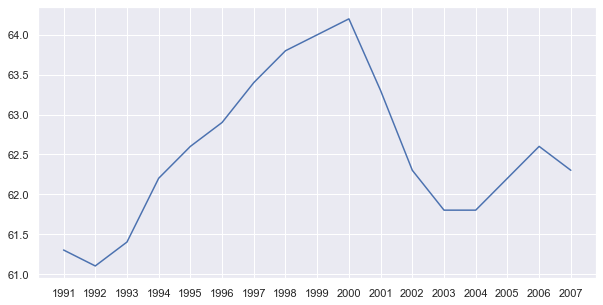

In [41]:
fig_size = (10, 5)

plt.figure(figsize=fig_size)
plt.plot(employment_us)

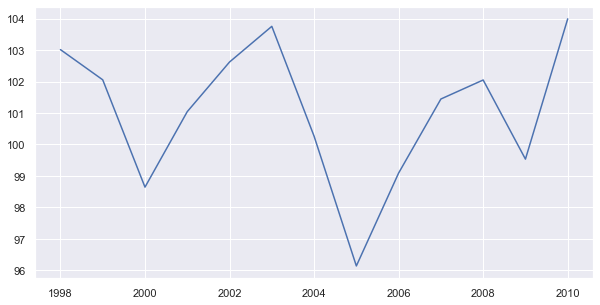

In [42]:
completion_rate_female_us.plot(figsize=fig_size)

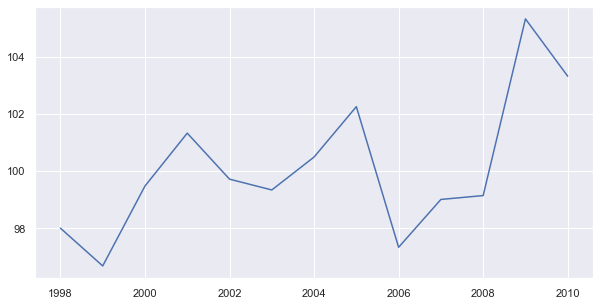

In [43]:
completion_rate_male_us.plot(figsize=fig_size)

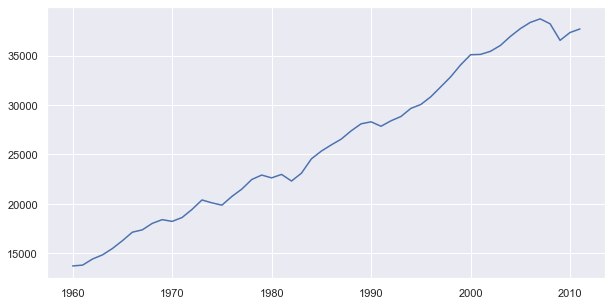

In [44]:
gdp_per_capita_us.plot(figsize=fig_size)

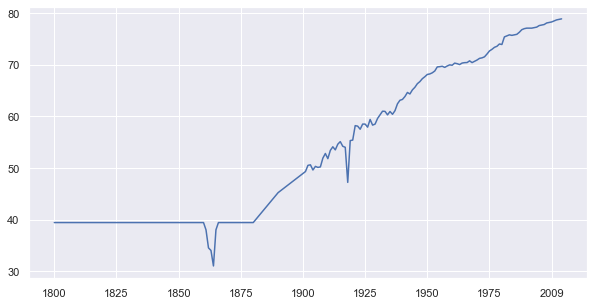

In [45]:
life_expectancy_us.plot(figsize=fig_size)